# Q2. Customer Segmentation

## 1. Exploratory Data Analysis

### 1.1 Importing libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

### 1.2 Loading the Data

In [29]:
df_init = pd.read_csv('customer_behavior_analytcis.csv')  # From csv to DataFrame

### 1.3  Initial Inspection

In [30]:
print(df_init.info())               # Info about the DataFrame
print(df_init.head())               # First 5 rows of the DataFrame
print(df_init.tail())               # Last 5 rows of the DataFrame
print(df_init.describe())           # Descriptive statistics of the DataFrame
print(df_init.dtypes)               # Data types of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0 

### 1.4 Data Reduction

In [31]:
# Reducing the columns which are not needed
df = df_init.drop(columns=['customer_id'])
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,7.0,129.34,52.17,18.0,0.0
1,22.0,24.18,9.19,15.0,7.0
2,2.0,32.18,90.69,50.0,2.0
3,25.0,26.85,11.22,16.0,10.0
4,7.0,125.45,34.19,30.0,3.0


### 1.5 Data Cleaning

In [32]:
print(df.isnull().sum())  # Checking for missing values

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
dtype: int64


In [33]:
df.fillna(df.mean(), inplace=True)  # Filling missing values with the mean of the column
print(df.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
dtype: int64


In [34]:
df.duplicated().sum()  # Checking for duplicates

0

### 1.6 Univariate Analysis

#### 1.6.1 Histogram

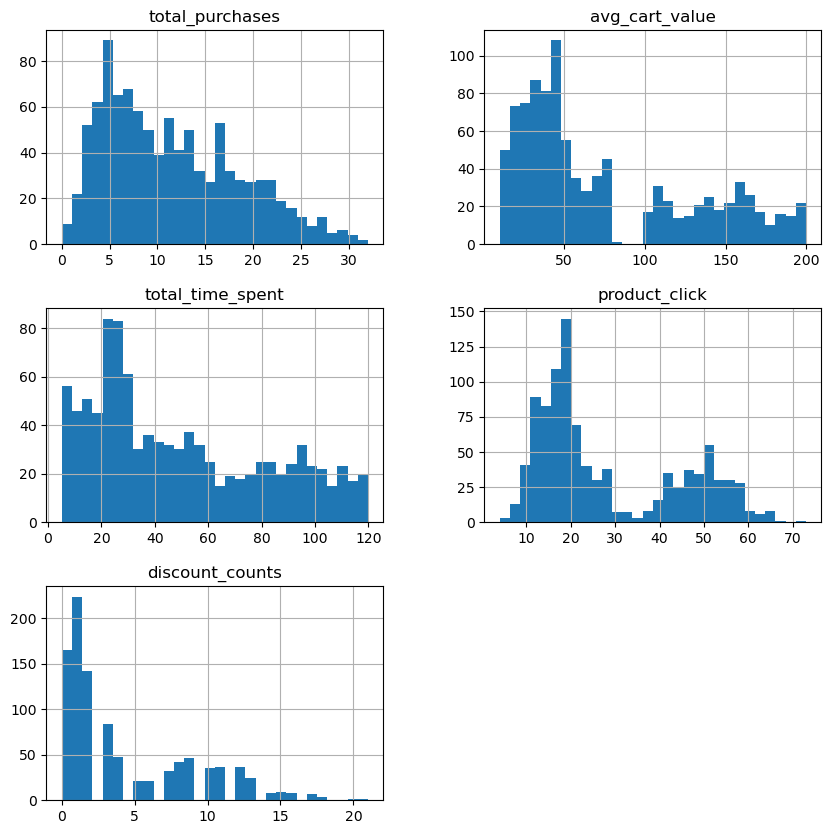

In [8]:
df.hist(figsize=(10, 10), bins=30)
plt.show()

#### 1.6.2 Box Plot

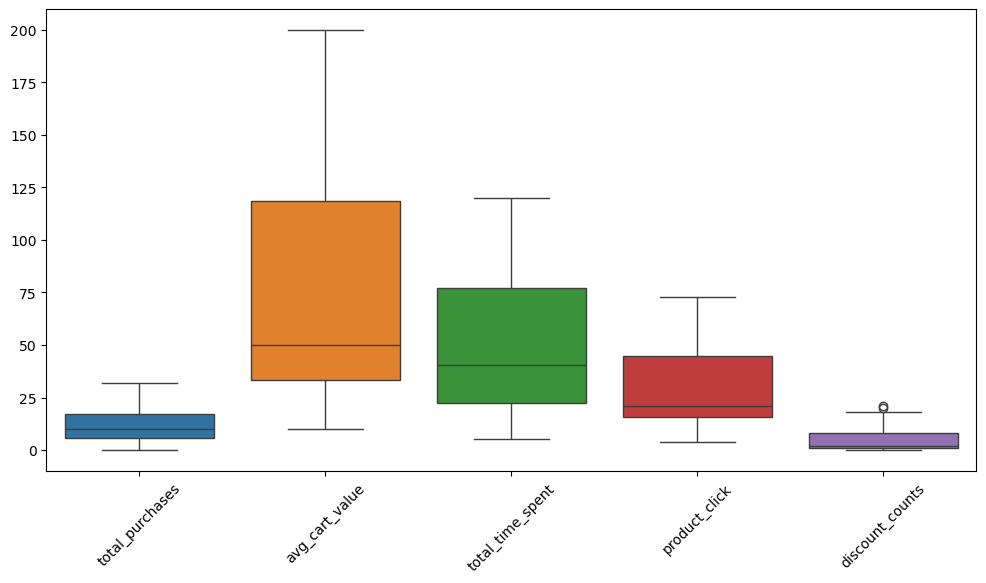

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

#### 1.6.3  Density Plot

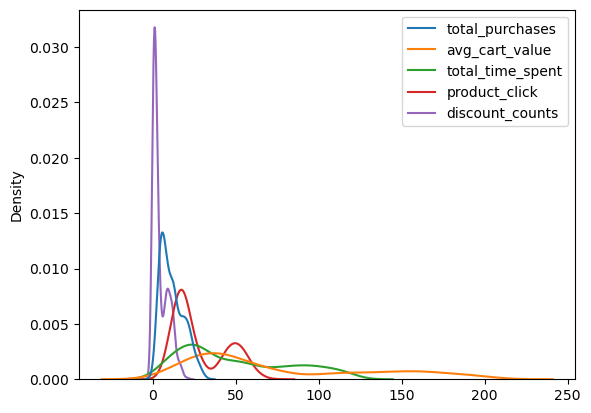

In [10]:
sns.kdeplot(df)
plt.show()

### 1.7 Bivariate  Analysis

#### 1.7.1  Scatter Plot

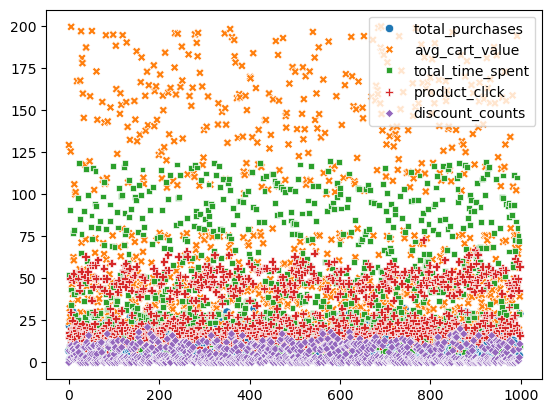

In [11]:
sns.scatterplot(df)
plt.show()

#### 1.7.2 Pair Plot

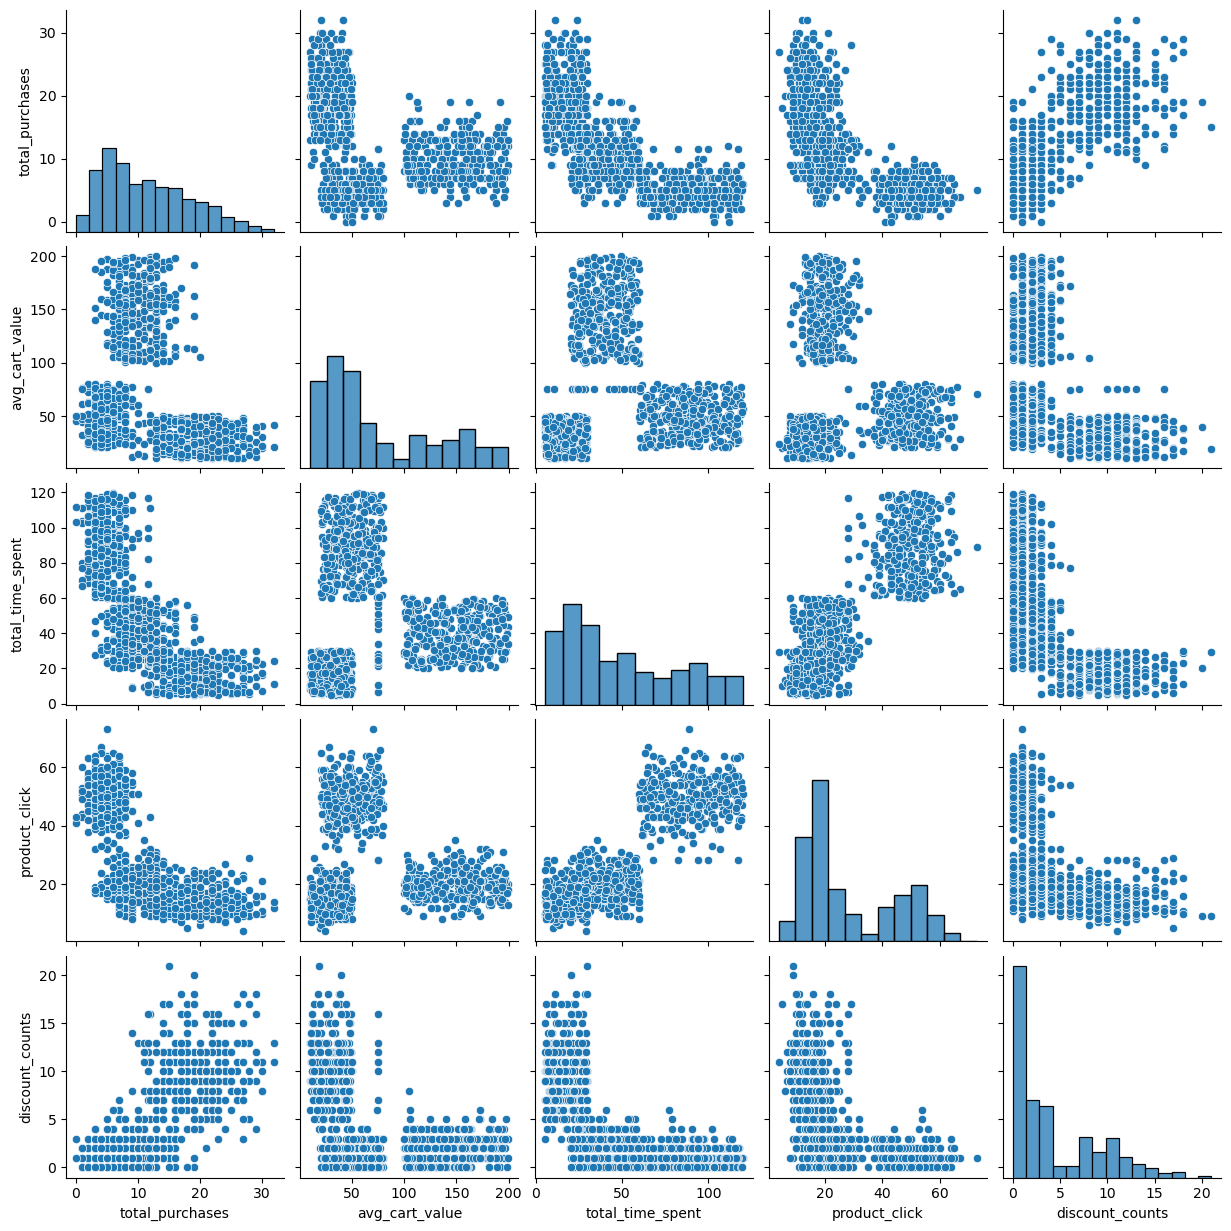

In [12]:
sns.pairplot(df)
plt.show()

#### 1.7.3 Correlation Map

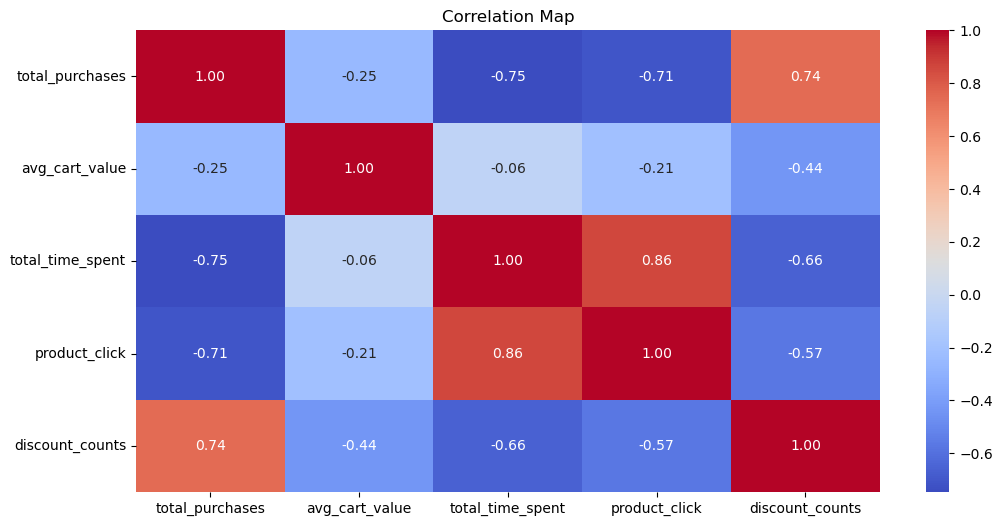

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

### 1.8 Scaling

In [35]:
# Standardizing the data for clustering algorithms to work better
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## 2. Selecting the model

In [ ]:
K = 3 # No. of clusters

### 2.1 K-means clustering

In [36]:
# KMeans Clustering Algorithm with 50 different initializations
kmeansModel = KMeans(n_clusters=K, n_init=50)
y_kmeans = kmeansModel.fit_predict(df_scaled)

c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### 2.2 Agglomerative Clustering

In [37]:
# Agglomerative Clustering Algorithm with 3 clusters (K)
agg_clustering = AgglomerativeClustering(n_clusters=K)
y_agg = agg_clustering.fit_predict(df_scaled)

## 3. Evaluating the model

### 3.1 Elbow Method

c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSII\anaconda3\envs\deep\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

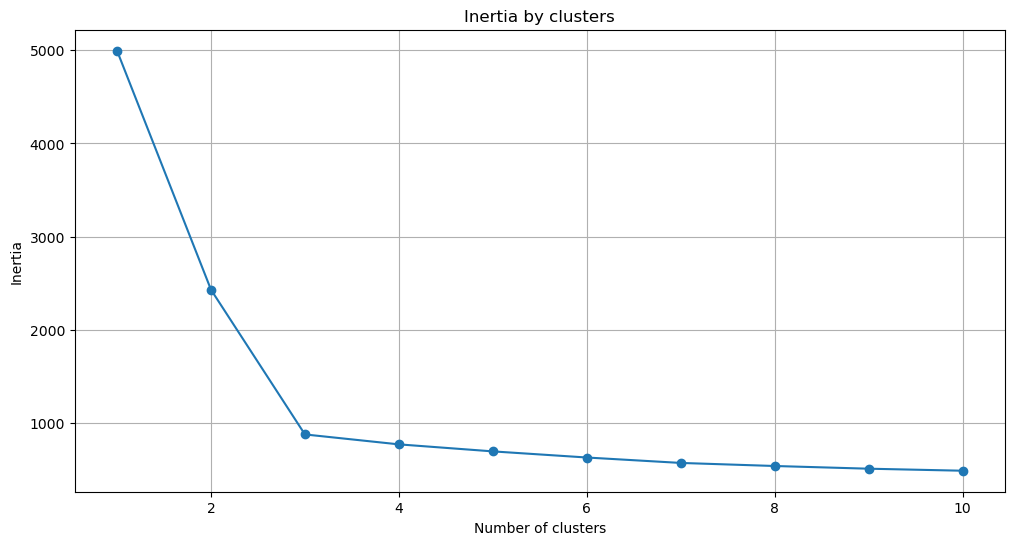

In [38]:
inertias = [] # List to store the inertia values
means = []    # List to store the number of clusters

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    means.append(k)

plt.figure(figsize=(12, 6))
plt.plot(means, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia by clusters')
plt.grid(True)
plt.show()

### 3.2 Silhouette score

In [39]:
# Silhouette Score for K-Means Clustering
silhouette_avg1 = silhouette_score(df_scaled, y_kmeans)
print(f'Silhouette Score for K-Means: {silhouette_avg1}')

Silhouette Score for K-Means: 0.6132930516948745


In [40]:
# Silhouette Score for Agglomerative Clustering
silhouette_avg2 = silhouette_score(df_scaled, y_agg)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg2}')

Silhouette Score for Agglomerative Clustering: 0.6121209543131557


### 3.3 Davies bouldin score

In [41]:
# Davies-Bouldin Score for K-Means Clustering
db_score = davies_bouldin_score(df_scaled, y_kmeans)
print(f'Davies-Bouldin Score for K-Means: {db_score}')

Davies-Bouldin Score for K-Means: 0.5677970051392437


In [42]:
# Davies-Bouldin Score for Agglomerative Clustering
db_score2 = davies_bouldin_score(df_scaled, y_agg)
print(f'Davies-Bouldin Score for Agglomerative Clustering: {db_score2}')

Davies-Bouldin Score for Agglomerative Clustering: 0.5676835354436786


###  3.4 Calinski-Harabasz Score

In [43]:
# Calinski-Harabasz Score for K-Means Clustering
ch_score = calinski_harabasz_score(df_scaled, y_kmeans)
print(f'Calinski-Harabasz Score for K-Means: {ch_score}')

Calinski-Harabasz Score for K-Means: 2341.252090453503


In [44]:
# Calinski-Harabasz Score for Agglomerative Clustering
ch_score2 = calinski_harabasz_score(df_scaled, y_agg)
print(f'Calinski-Harabasz Score for Agglomerative Clustering: {ch_score2}')

Calinski-Harabasz Score for Agglomerative Clustering: 2327.759766685867


### 3.5 Visualize using 2D PCA

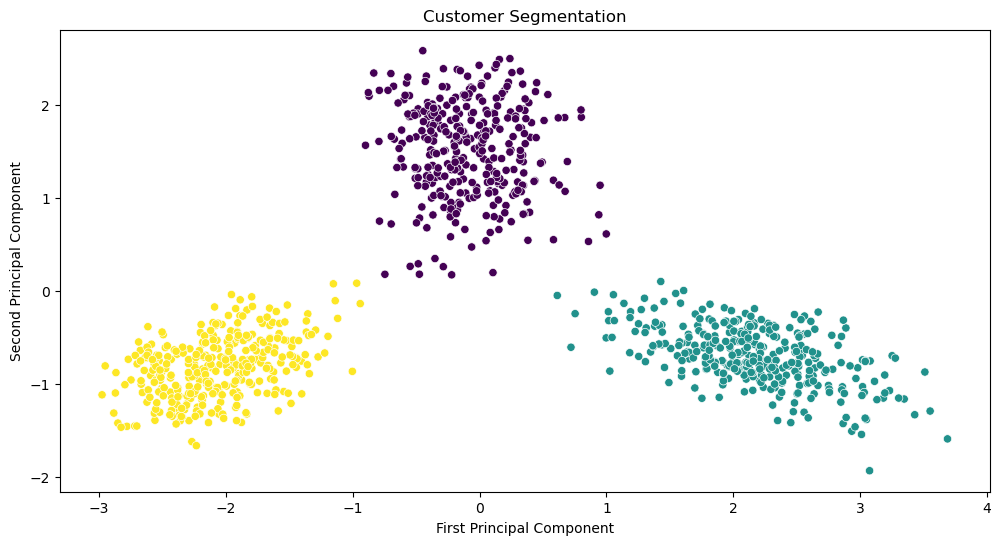

In [45]:
# PCA for 2D visualization of the clusters formed by K-Means Clustering Algorithm with 3 clusters
pca2D = PCA(n_components=2)
pcaData = pca2D.fit_transform(df_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pcaData[:, 0], y=pcaData[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Segmentation')
plt.show()

## 04. Analyze Clusters

In [46]:
# using the original DataFrame with the 'Cluster' column added to it 
df_init['Cluster'] = y_kmeans

# Grouping the DataFrame by 'Cluster' and calculating the mean of each column
cluster_summary = df_init.groupby('Cluster').mean() 
print(cluster_summary)


         total_purchases  avg_cart_value  total_time_spent  product_click  \
Cluster                                                                     
0              10.175385      147.327169         40.472126      19.895385   
1              19.711656       30.399509         17.511682      14.944785   
2               4.862805       49.029848         90.211837      49.716463   

         discount_counts  
Cluster                   
0               1.940120  
1               9.969970  
2               1.027108  


C:\Users\MSII\AppData\Local\Temp\ipykernel_8276\3731366562.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df_init.groupby('Cluster').mean()


In [27]:
df_init["Customer_Type"] = df_init["Cluster"].map({
    0: "Window Shoppers",
    1: "Bargain Hunters",
    2: "High Spenders"
})  # Adjust mapping based on your results

print(df_init[["customer_id","Customer_Type"]])  # See results


    customer_id    Customer_Type
0       CM00000    High Spenders
1       CM00001  Bargain Hunters
2       CM00002  Window Shoppers
3       CM00003  Bargain Hunters
4       CM00004    High Spenders
..          ...              ...
994     CM00994  Window Shoppers
995     CM00995  Window Shoppers
996     CM00996  Bargain Hunters
997     CM00997  Window Shoppers
998     CM00998  Bargain Hunters

[999 rows x 2 columns]


In [47]:
# Save the results to a new csv file
df_init.to_csv('customer_behavior_analytcis_analyzed.csv', index=False)